In [13]:
import pandas as pd
import pickle
# import nltk
# nltk.download('wordnet')
import icrawler
from icrawler.builtin import BingImageCrawler

In [4]:
import compsyn as cs
import os
import PIL
from PIL import Image
import numpy as np
from compsyn.helperfunctions import settings, search_and_download, run_google_vision, write_img_classifications_to_file
from compsyn.wordnet_functions import get_wordnet_tree_data

In [5]:
# normally not a good idea to ignore all warnings, but the only warnings in this nb are matplotlib user warnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### Load words from experiments

In [6]:
dfColor = pd.read_csv(r'../../../data/norming/colorPickerData.csv')
cols = ["word", "participantID", "button_pressed", "response_munsell", "response_r", "response_g", "response_b", "condition"]
dfColor = dfColor[cols]

# identify target words
uniqueWords = set(dfColor['word'].to_list())
colorWords = set(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])
targetWords = list(uniqueWords-colorWords)

### Get WordNet data (not used)

In [5]:
number_images = 100 
search_terms = targetWords
filter_data = True
get_tree_data = True

In [6]:
home = os.getcwd()

In [7]:
n_categories = 5

In [9]:
# if get_tree_data: 
#     print("Adding Search Terms from Tree")
#     tree_search_terms, raw_tree, all_tree_data = get_wordnet_tree_data(search_terms, home)
#     search_terms = tree_search_terms[:n_categories]
#     print(search_terms)
#     print(all_tree_data.head())

### Download images using BingImageCrawler

In [14]:
# # caution! takes a long time to run
# for word in targetWords:
#     print(word)
#     bing_crawler = BingImageCrawler(storage={'root_dir': './downloads/%s' % word})
#     bing_crawler.crawl(keyword=word, max_num=100)

### Get compsyn means and standard deviations
as per sample notebook [`vectors.ipynb`](https://github.com/comp-syn/comp-syn/blob/master/notebooks/vectors.ipynb)

In [16]:
path = "./downloads"
jab_means = {}
jab_std = {}
for label in targetWords:
    vector = cs.vectors.Vector(label)
    vector.load_from_folder(path)
    jab_means[label] = vector.jzazbz_dist
    jab_std[label] = vector.jzazbz_dist_std

print(jab_means)
print(jab_std)

# pickle outputs for regressions
with open('jzazbz-means.pickle', 'wb') as file1:
  pickle.dump(jab_means, file1)

with open('jzazbz-std.pickle', 'wb') as file2:
  pickle.dump(jab_std, file2)

[2021-02-18 20:01:15,850] (compsyn.ImageAnalysis)  INFO: passion is being compressed.
[2021-02-18 20:01:19,541] (compsyn.ImageAnalysis)  INFO: responsibility is being compressed.
[2021-02-18 20:01:25,454] (compsyn.ImageAnalysis)  INFO: diner is being compressed.
[2021-02-18 20:01:29,749] (compsyn.ImageAnalysis)  INFO: hairdryer is being compressed.
[2021-02-18 20:01:35,464] (compsyn.ImageAnalysis)  INFO: glee is being compressed.
[2021-02-18 20:01:41,624] (compsyn.ImageAnalysis)  INFO: book is being compressed.
[2021-02-18 20:01:49,430] (compsyn.ImageAnalysis)  INFO: fire is being compressed.
[2021-02-18 20:01:54,826] (compsyn.ImageAnalysis)  INFO: shoes is being compressed.
[2021-02-18 20:02:01,123] (compsyn.ImageAnalysis)  INFO: thistle is being compressed.
[2021-02-18 20:02:09,332] (compsyn.ImageAnalysis)  INFO: spinach is being compressed.
[2021-02-18 20:02:14,891] (compsyn.ImageAnalysis)  INFO: elegance is being compressed.
[2021-02-18 20:02:18,316] (compsyn.ImageAnalysis)  INFO: 

[2021-02-18 20:11:59,332] (compsyn.ImageAnalysis)  INFO: romance is being compressed.
[2021-02-18 20:12:05,982] (compsyn.ImageAnalysis)  INFO: fear is being compressed.
[2021-02-18 20:12:12,663] (compsyn.ImageAnalysis)  INFO: thoughtlessness is being compressed.
[2021-02-18 20:12:18,437] (compsyn.ImageAnalysis)  INFO: cornflour is being compressed.
[2021-02-18 20:12:25,318] (compsyn.ImageAnalysis)  INFO: dream is being compressed.
[2021-02-18 20:12:36,249] (compsyn.ImageAnalysis)  INFO: toast is being compressed.
[2021-02-18 20:12:42,206] (compsyn.ImageAnalysis)  INFO: hate is being compressed.
[2021-02-18 20:12:49,494] (compsyn.ImageAnalysis)  INFO: tarantula is being compressed.
[2021-02-18 20:12:56,933] (compsyn.ImageAnalysis)  INFO: unicorn is being compressed.
[2021-02-18 20:13:04,247] (compsyn.ImageAnalysis)  INFO: bracelet is being compressed.
[2021-02-18 20:13:13,430] (compsyn.ImageAnalysis)  INFO: lemon is being compressed.
[2021-02-18 20:13:19,401] (compsyn.ImageAnalysis)  IN

[2021-02-18 20:24:09,123] (compsyn.ImageAnalysis)  INFO: couch is being compressed.
[2021-02-18 20:24:19,572] (compsyn.ImageAnalysis)  INFO: bus is being compressed.
[2021-02-18 20:24:24,439] (compsyn.ImageAnalysis)  INFO: freedom is being compressed.
[2021-02-18 20:24:30,178] (compsyn.ImageAnalysis)  INFO: appearance is being compressed.
[2021-02-18 20:24:35,435] (compsyn.ImageAnalysis)  INFO: trouble is being compressed.
[2021-02-18 20:24:42,190] (compsyn.ImageAnalysis)  INFO: weapon is being compressed.
[2021-02-18 20:24:49,729] (compsyn.ImageAnalysis)  INFO: suffering is being compressed.
{'passion': array([ 38.16008997, 236.09399173,  24.49962722, 151.56208015,
        20.8909576 , 210.26368062,  13.49702468, 146.78604684]), 'responsibility': array([ 73.6804214 , 240.97093591,   8.75522293,  51.15303055,
        85.94601498, 302.56591342,   2.88556934,  75.79639027]), 'diner': array([ 32.88321971, 193.13632492,   3.32638951, 253.77553799,
        30.08868981, 189.05158419,   2.776

In [17]:
# # test unpickling outputs
# pickle_off = open("jzazbz-means.pickle","rb")
# means = pickle.load(pickle_off)
# pickle_off = open("jzazbz-std.pickle","rb")
# std = pickle.load(pickle_off)
# print(means)
# print(std)

{'passion': array([ 38.16008997, 236.09399173,  24.49962722, 151.56208015,
        20.8909576 , 210.26368062,  13.49702468, 146.78604684]), 'responsibility': array([ 73.6804214 , 240.97093591,   8.75522293,  51.15303055,
        85.94601498, 302.56591342,   2.88556934,  75.79639027]), 'diner': array([ 32.88321971, 193.13632492,   3.32638951, 253.77553799,
        30.08868981, 189.05158419,   2.7762569 , 136.71549577]), 'hairdryer': array([9.79429122e+00, 3.69806061e+02, 3.41219526e+00, 5.48186737e+01,
       1.73121639e+01, 3.35252979e+02, 3.60270108e-01, 5.09968649e+01]), 'glee': array([ 39.10190942, 171.0999387 ,   3.34301305, 235.4662086 ,
        24.73449773, 160.23577949,   1.47041866, 206.30173315]), 'book': array([ 40.21255673, 172.9540995 ,   0.77308916, 182.66002421,
         7.56385413, 249.28148641,   0.41700687, 187.89138178]), 'fire': array([  5.78261505, 137.66780309,   1.58912711, 450.37977544,
         7.60833033,  61.83180025,   0.96266224, 175.9313853 ]), 'shoes': arr

### Unused analyses

In [8]:
imagedata = cs.datahelper.ImageData()

In [19]:
# # caution! takes a long time to run
# imagedata.load_image_dict_from_subfolders("./downloads")

Now that we have our images and the corresponding vectors in both RGB form and JzAzBz form, we can visualise these images. Let us start with a simple Colorogram (composite image).

In [47]:
imageanalysis = cs.analysis.ImageAnalysis(imagedata)

In [48]:
imageanalysis.compute_color_distributions(imageanalysis.labels_list, color_rep=['jzazbz', 'rgb'])

In [49]:
compressed_image_dict = imageanalysis.get_composite_image()

[2021-02-12 04:05:14,736] (compsyn.ImageAnalysis)  INFO: adoration is being compressed.
[2021-02-12 04:05:14,800] (compsyn.ImageAnalysis)  INFO: admiration is being compressed.
[2021-02-12 04:05:14,847] (compsyn.ImageAnalysis)  INFO: ache is being compressed.
[2021-02-12 04:05:14,895] (compsyn.ImageAnalysis)  INFO: anxiety is being compressed.
[2021-02-12 04:05:14,943] (compsyn.ImageAnalysis)  INFO: absurdity is being compressed.
[2021-02-12 04:05:15,016] (compsyn.ImageAnalysis)  INFO: shampoo is being compressed.
[2021-02-12 04:05:15,060] (compsyn.ImageAnalysis)  INFO: magic is being compressed.
[2021-02-12 04:05:15,121] (compsyn.ImageAnalysis)  INFO: peculiarity is being compressed.
[2021-02-12 04:05:15,172] (compsyn.ImageAnalysis)  INFO: hammer is being compressed.
[2021-02-12 04:05:15,222] (compsyn.ImageAnalysis)  INFO: urge is being compressed.
[2021-02-12 04:05:15,266] (compsyn.ImageAnalysis)  INFO: misconception is being compressed.
[2021-02-12 04:05:15,311] (compsyn.ImageAnalys

[2021-02-12 04:05:18,476] (compsyn.ImageAnalysis)  INFO: appearance is being compressed.
[2021-02-12 04:05:18,516] (compsyn.ImageAnalysis)  INFO: happiness is being compressed.
[2021-02-12 04:05:18,555] (compsyn.ImageAnalysis)  INFO: chaos is being compressed.
[2021-02-12 04:05:18,606] (compsyn.ImageAnalysis)  INFO: memory is being compressed.
[2021-02-12 04:05:18,646] (compsyn.ImageAnalysis)  INFO: vegetable is being compressed.
[2021-02-12 04:05:18,688] (compsyn.ImageAnalysis)  INFO: verb is being compressed.
[2021-02-12 04:05:18,723] (compsyn.ImageAnalysis)  INFO: window is being compressed.
[2021-02-12 04:05:18,767] (compsyn.ImageAnalysis)  INFO: defiance is being compressed.
[2021-02-12 04:05:18,811] (compsyn.ImageAnalysis)  INFO: discretion is being compressed.
[2021-02-12 04:05:18,854] (compsyn.ImageAnalysis)  INFO: warehouse is being compressed.
[2021-02-12 04:05:18,894] (compsyn.ImageAnalysis)  INFO: gist is being compressed.
[2021-02-12 04:05:18,965] (compsyn.ImageAnalysis)  

[2021-02-12 04:05:22,081] (compsyn.ImageAnalysis)  INFO: lemon is being compressed.
[2021-02-12 04:05:22,110] (compsyn.ImageAnalysis)  INFO: freedom is being compressed.
[2021-02-12 04:05:22,141] (compsyn.ImageAnalysis)  INFO: otter is being compressed.
[2021-02-12 04:05:22,175] (compsyn.ImageAnalysis)  INFO: revolt is being compressed.
[2021-02-12 04:05:22,199] (compsyn.ImageAnalysis)  INFO: mysterious is being compressed.
[2021-02-12 04:05:22,231] (compsyn.ImageAnalysis)  INFO: berry is being compressed.
[2021-02-12 04:05:22,268] (compsyn.ImageAnalysis)  INFO: toilet is being compressed.
[2021-02-12 04:05:22,301] (compsyn.ImageAnalysis)  INFO: optimism is being compressed.


Save colorgrams to disk; replaces `imageanalysis.save_colorgram_to_disk()`

In [84]:
for word in targetWords:
    print(word)
    im = PIL.Image.fromarray(compressed_image_dict[word].astype(np.uint8))
    im.save(os.path.join("colorgrams", word + "_colorgram.png"))

prune
stomach
discomfort
needle
tree
freedom
notion
iron
despair
romance
love
warehouse
kangaroo
butterfly
shoes
oddity
tortoise
cockroach
razor
sadness
desire
mirror
weariness
positivity
faith
defiance
drums
muscle
toe
hairdryer
pheasant
embarrassment
gossip
cow
anxiety
tie
toast
admiration
berry
modesty
pain
fame
flesh
vegetable
dream
spinach
craziness
excitement
microscope
necklace
happiness
thoughtlessness
skin
fear
clarity
hammer
moose
couch
success
noun
opinion
leg
jeans
humiliation
sanity
daffodil
bread
tendency
grape
mansion
bus
chaos
magazine
glamour
badger
elephant
robin
rock
magic
obligation
elegance
suit
train
otter
viciousness
speed
insanity
weapon
shampoo
wisdom
hell
tomato
earphones
ego
noblity
boat
glee
passion
justice
suffering
chest
building
harp
equality
disgust
ache
misconception
cigar
horn
imagination
jealousy
surprise
diner
cabinet
apple
fish
purse
shyness
chalk
staple
flag
friendliness
divinity
pride
peculiarity
chair
inflamation
revolt
bone
reassurance
temptatio

Sample colorgrams

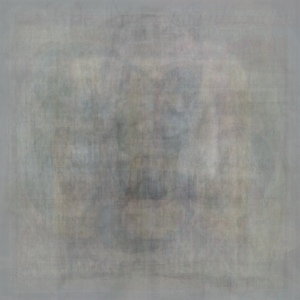

In [52]:
PIL.Image.fromarray(compressed_image_dict['ego'].astype(np.uint8))

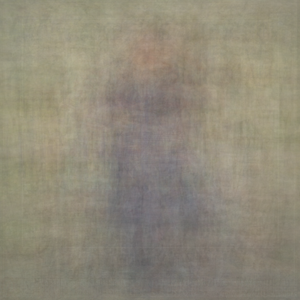

In [53]:
PIL.Image.fromarray(compressed_image_dict['modesty'].astype(np.uint8))

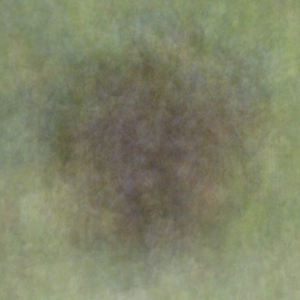

In [54]:
PIL.Image.fromarray(compressed_image_dict['grape'].astype(np.uint8))

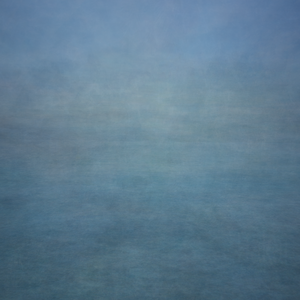

In [55]:
PIL.Image.fromarray(compressed_image_dict['ocean'].astype(np.uint8))

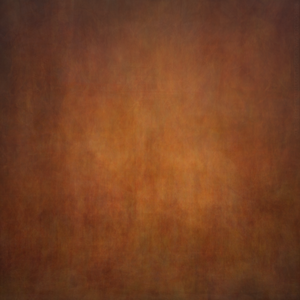

In [56]:
PIL.Image.fromarray(compressed_image_dict['fire'].astype(np.uint8))

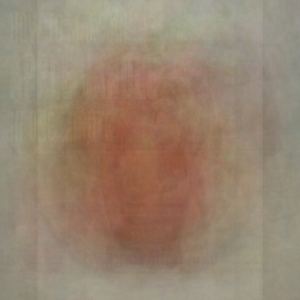

In [57]:
PIL.Image.fromarray(compressed_image_dict['apple'].astype(np.uint8))